In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
pd.set_option("display.width",10000)
df = pd.read_csv("C:/Users/kamur/Desktop/termdepositcase/term-deposit-marketing-2020.csv", sep=",")


print(df) #data has 40000 rows and 14 columns, dataframe
print(df.head())  #check only first six rows
print(df.shape)  #dimensions of data
print(df.info())  #columns types are ok. no missing value for columns.
df.isnull().sum()

print(df.describe())  #check numerical data

# df.y.value_counts().plot.bar() # # of customers not subscribed is very high
# df['y'].value_counts()
# plt.legend()
# plt.title('Subscribe Distribution')
df.y.count()
df.corr()  #no high correlation between numerical variables

import matplotlib.pyplot as plt
# df['y'].plot(kind='hist')
# plt.show()


# categoricalvariables=['default', 'housing', 'loan', 'y','marital','education','contact']
binaryvariables =  ['default', 'housing', 'loan', 'y']

df['default'].value_counts().plot.bar()
plt.title('default Distribution')
plt.show()
df['housing'].value_counts().plot.bar()
plt.title('housing Distribution')
plt.show()
df['loan'].value_counts().plot.bar()
plt.title('loan Distribution')
plt.show()
df['y'].value_counts().plot.bar()
plt.title('y Distribution')
plt.show()
df['marital'].value_counts().plot.bar()
plt.title('marital Distribution')
plt.show()
df['education'].value_counts().plot.bar()
plt.title('education Distribution')
plt.show()
print(df.education.value_counts())
print(df.job.value_counts())
df = df[df.education != 'unknown']
df = df[df.job != 'unknown']
print(df.education.value_counts())

df['contact'].value_counts().plot.bar()
plt.title('contact Distribution')
plt.show()
print(df.contact.value_counts())

df.drop('contact', axis=1, inplace=True)
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[binaryvariables] = df[binaryvariables].apply(binary_map)
print(df.head())

print(df.month.value_counts())

# def monthnumber(m):
#     return m.map({'jan': 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12})

# df['month'] = df['month'].apply(monthnumber)

df['month'].replace({'jan': 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},inplace=True)
# Creating a dummy variable for some of the categorical variables and dropping the first one.


dummydata = pd.get_dummies(df[['marital', 'education']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummydata], axis=1)

df.drop(['marital', 'education'], axis=1, inplace=True)


from sklearn import preprocessing
lb_en  = preprocessing.LabelEncoder()
df['job'] = lb_en.fit_transform(df['job'])
print(df.job.unique())
print(df.head())

df.corr()[df.corr()>0.4]
#there is correlation more than 0.4 between duration and y

print(df['y'].value_counts())
X = df.drop('y', axis = 1)
y=df['y']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['age','balance','month','day','duration']] = sc.fit_transform(X[['age','balance','month','day','duration']])



from imblearn import over_sampling
from imblearn import under_sampling 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Xtraincolumns = X_train.columns
smotetrainX,smotetrainy=smote.fit_sample(X_train, y_train)
smotetrainX = pd.DataFrame(data=smotetrainX,columns=Xtraincolumns )
smotetrainy= pd.DataFrame(data=smotetrainy,columns=['y'])






import statsmodels.api as sm
logit_model=sm.Logit(smotetrainy,smotetrainX)
result=logit_model.fit()
print(result.summary2())







from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)




from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

# grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]} # l1 = lasso ve l2 = ridge

# logreg = LogisticRegression()
# logreg_cv = GridSearchCV(logreg, grid, cv=10)
# logreg_cv.fit(x_train,y_train)

# print("tuned hyperparameters: (best parameters): ",logreg_cv.best_params_)
# print("accuracy: ",logreg_cv.best_score_)

# # logreg2 = LogisticRegression(C=100,penalty="l1")
# # logreg2.fit(x_train,y_train)
# # print("score: ",logreg2.score(x_test,y_test))

# y_pred = model.predict(X_test)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(accuracies.mean())
print(model.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(model.intercept_)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


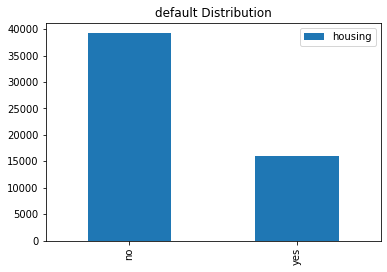

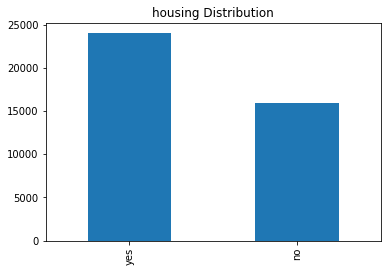

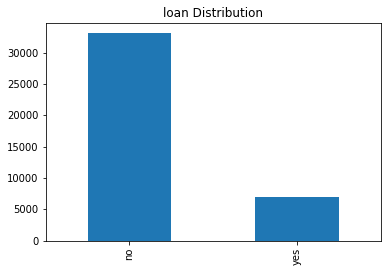

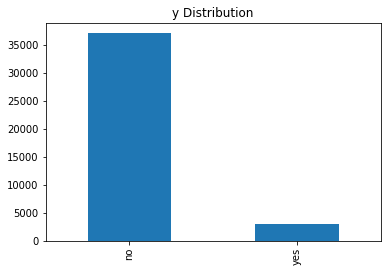

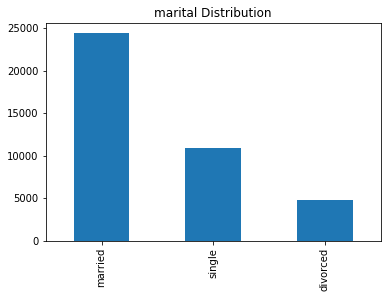

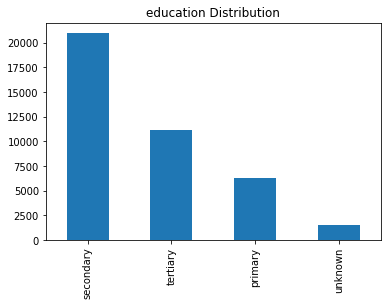

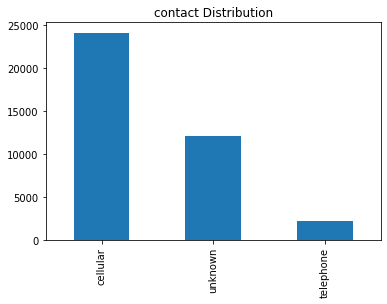

cellular     24108
unknown      12043
telephone     2187
Name: contact, dtype: int64
may    12974
jul     6128
aug     5070
jun     4405
nov     3492
apr     2621
feb     2205
jan     1110
mar      243
oct       77
dec       13
Name: month, dtype: int64
education 94.26355503023655 3.395698344366898e-21
marital 136.50618789259212 2.280646244843172e-30
default 2.3625231635264665 0.1242810289838368
job 151.84712711537833 1.5534222521795608e-27
housing 117.21405236972785 2.5769909633758457e-27
loan 40.479131590560016 1.9872725897696565e-10
day 388.4657478123096 5.944952698099051e-64
month 1512.5501883612537 0.0
age PointbiserialrResult(correlation=-0.01932411786901776, pvalue=0.00015438369237348931)
balance PointbiserialrResult(correlation=0.027283912035101682, pvalue=9.140288043331718e-08)
duration PointbiserialrResult(correlation=0.46252004504354444, pvalue=0.0)
campaign PointbiserialrResult(correlation=-0.040342382793194895, pvalue=2.7438683172277953e-15)
            age  default   bala

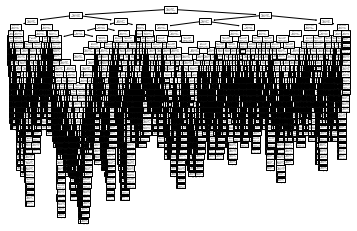

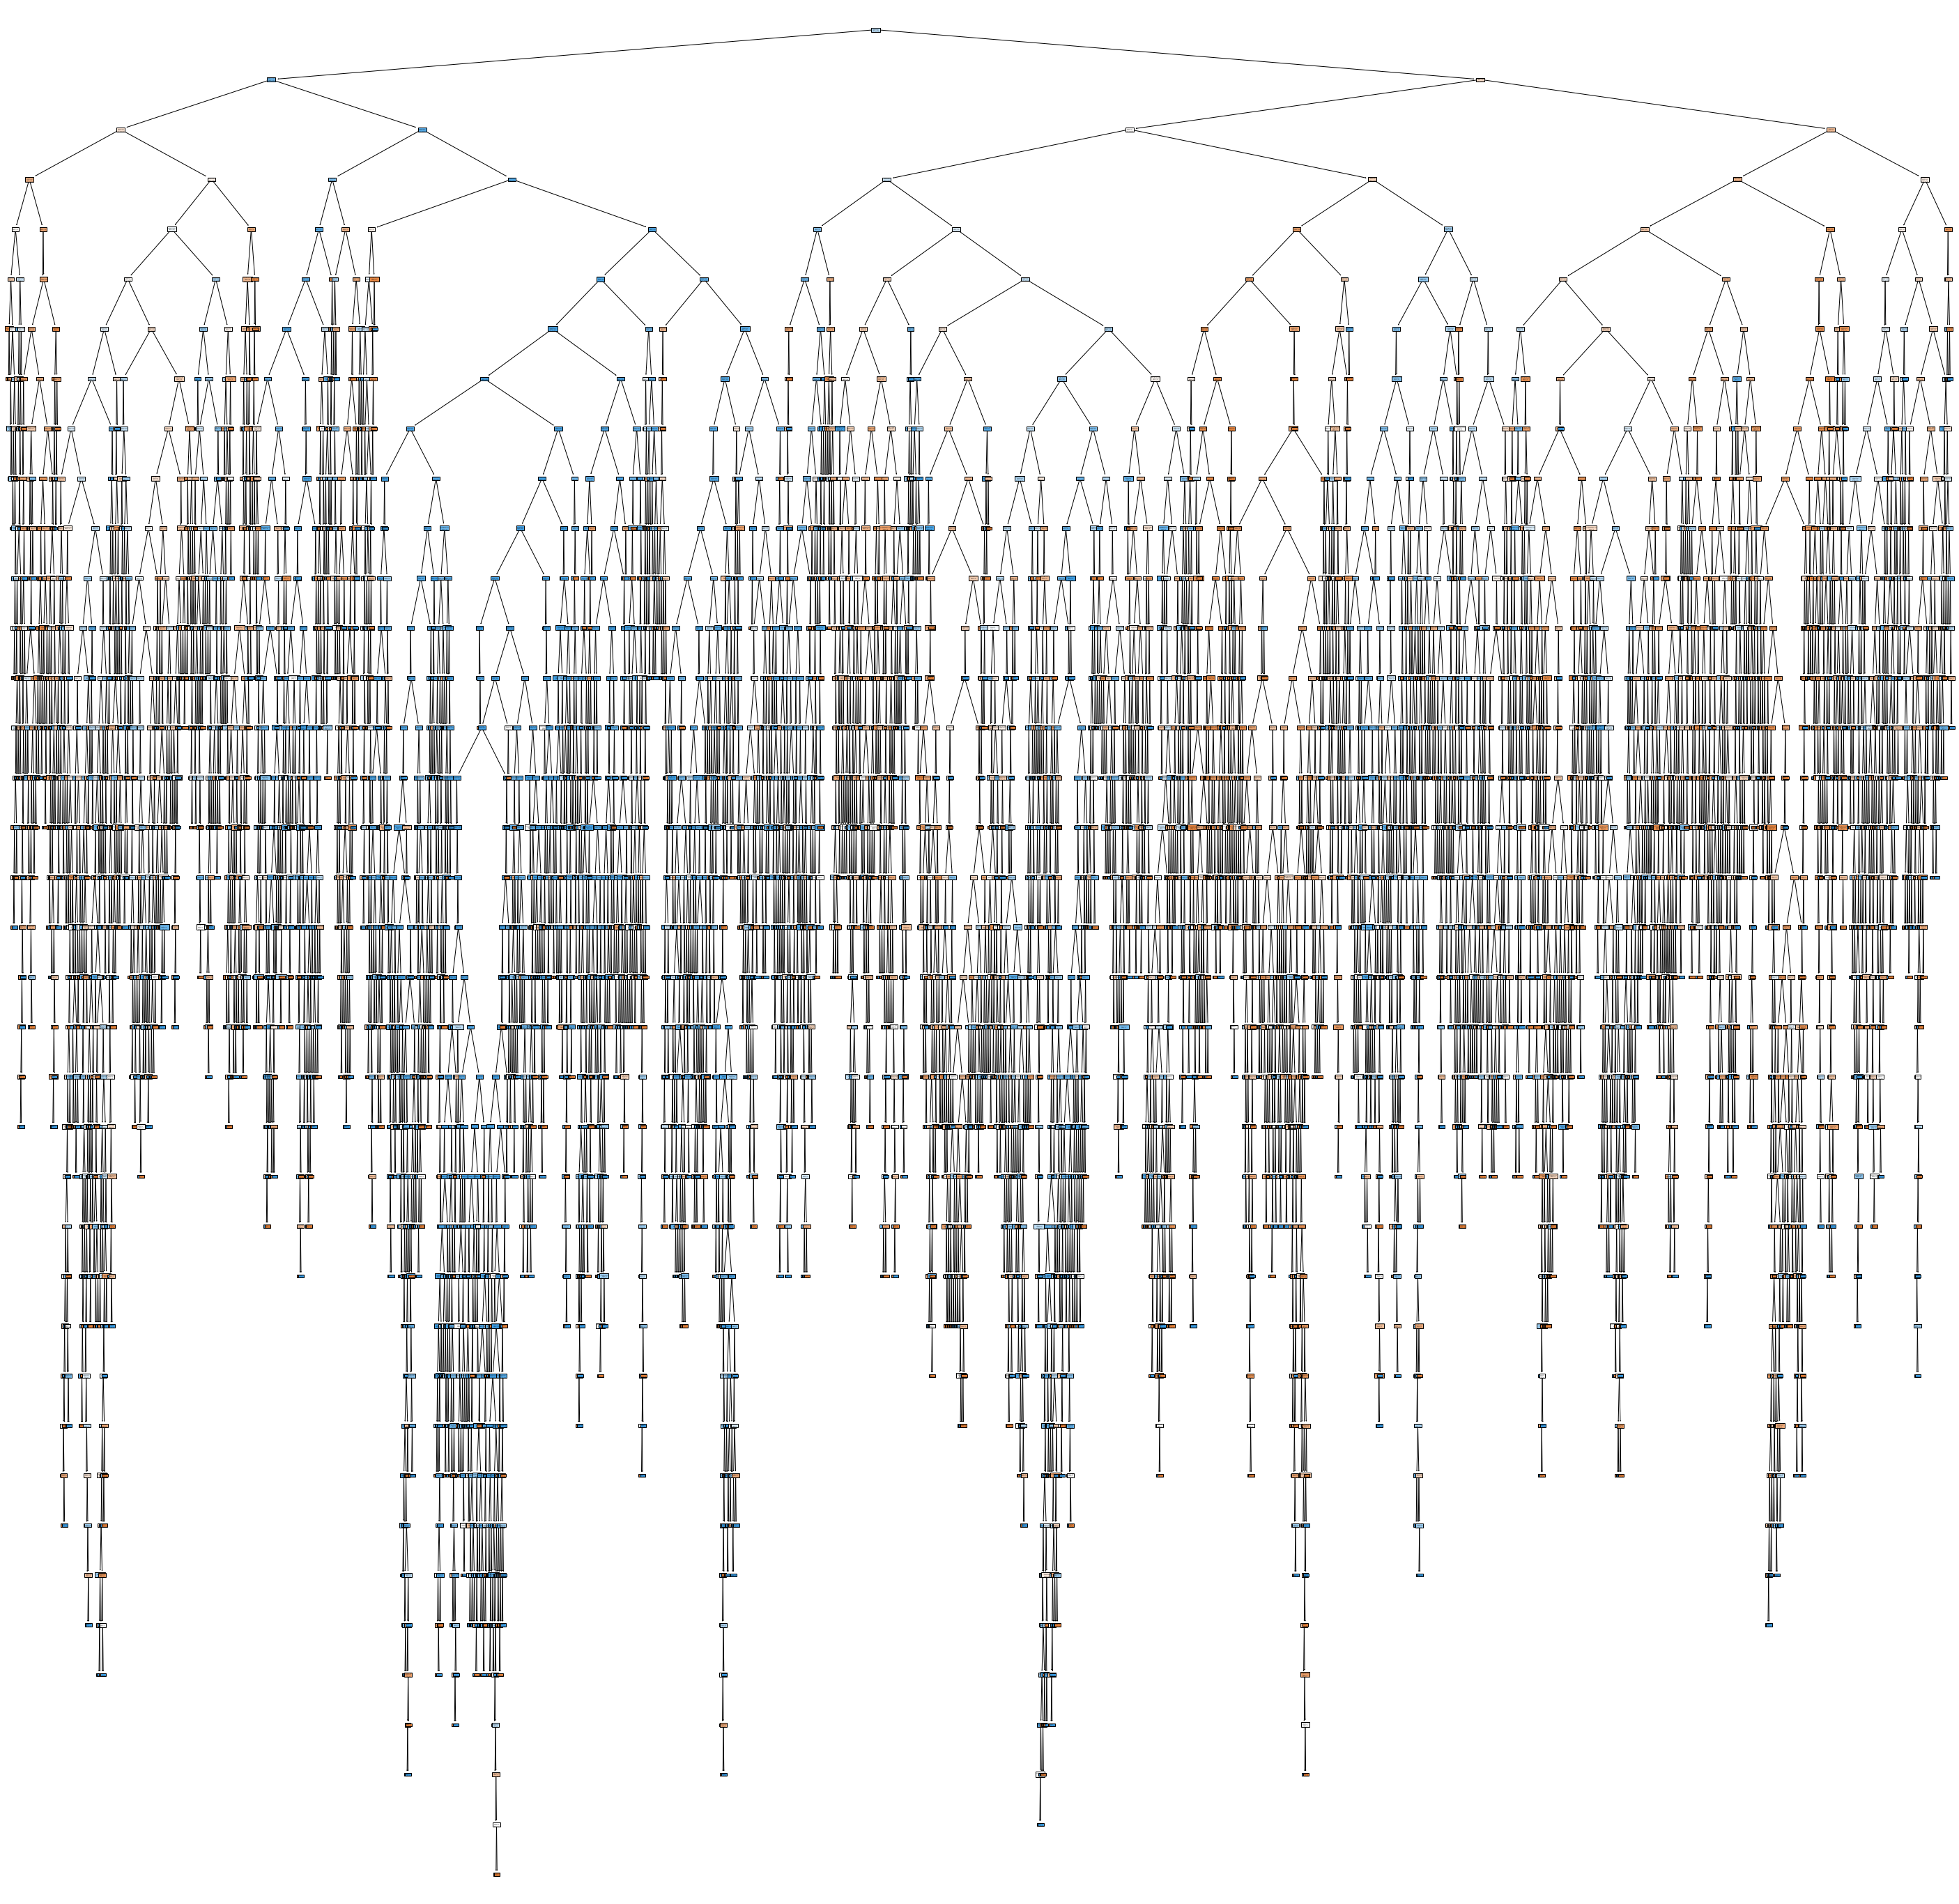

In [9]:

import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
pd.set_option("display.width",10000)
dfs = pd.read_csv("C:/Users/kamur/Desktop/termdepositcase/term-deposit-marketing-2020.csv", sep=",")


# print(df) #data has 40000 rows and 14 columns, dataframe
# print(df.head())  #check only first six rows
# print(df.shape)  #dimensions of data
# print(df.info())  #columns types are ok. no missing value for columns.
dfs.isnull().sum() #no missing value

print(dfs.describe())  #check numerical data
import matplotlib.pyplot as plt
dfs.housing.value_counts().plot.bar() # # of customers not subscribed is very high
dfs['housing'].value_counts()
plt.legend()
plt.title('Housing Distribution')
dfs.housing.count()



# df['y'].plot(kind='hist')
# plt.show()


categoricalvariables=['default', 'housing', 'loan', 'y','marital','education','contact']
binaryvariables =  ['default', 'housing', 'loan', 'y']
numericvariables=['age','balance','duration','campaign']

dfs['default'].value_counts().plot.bar()
plt.title('default Distribution')
plt.show()
dfs['housing'].value_counts().plot.bar()
plt.title('housing Distribution')
plt.show()
dfs['loan'].value_counts().plot.bar()
plt.title('loan Distribution')
plt.show()
dfs['y'].value_counts().plot.bar()
plt.title('y Distribution')
plt.show()
dfs['marital'].value_counts().plot.bar()
plt.title('marital Distribution')
plt.show()
dfs['education'].value_counts().plot.bar()
plt.title('education Distribution')
plt.show()
# print(df.education.value_counts())
# print(df.job.value_counts())
#removing unknown lines as their quantities are small
dfs = dfs[dfs.education != 'unknown']
dfs = dfs[dfs.job != 'unknown']
# print(df.education.value_counts())

dfs['contact'].value_counts().plot.bar()
plt.title('contact Distribution')
plt.show()
print(dfs.contact.value_counts())



dfs.drop('contact', axis=1, inplace=True) #I removed contact variable as most of values are unknown for this variable

#assigning 0 and 1 for binary variables
def binary_map(x):
    return x.map({'yes': 1, "no": 0})


dfs[binaryvariables] = dfs[binaryvariables].apply(binary_map)
# print(df.head())

print(dfs.month.value_counts())

dfs['month'].replace({'jan': 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},inplace=True)  #replacing months with numeric values as we need to convert to numeric and they are ordinal

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummydata = pd.get_dummies(dfs[['marital', 'education','job']], drop_first=True)

dfs = pd.concat([dfs, dummydata], axis=1)



#encoding categorical variables to do chisquaretest
from sklearn import preprocessing
lb_en  = preprocessing.LabelEncoder()
job = lb_en.fit_transform(dfs['job'])
# print(df.job.unique())
# print(type(df.job))
education = lb_en.fit_transform(dfs['education'])
marital = lb_en.fit_transform(dfs['marital'])

#chisquare test between categorical variables and dependent categorical variable to check association
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(pd.crosstab(education,dfs['y']))
print("education",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(marital,dfs['y']))
print("marital",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['default'],dfs['y']))
print("default",stat,p)  #independent, remove this variable

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['job'].values,dfs['y']))
print("job",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['housing'],dfs['y']))
print("housing",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['loan'],dfs['y']))
print("loan",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['day'],dfs['y']))
print("day",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['month'],dfs['y']))
print("month",stat,p) #dependent

#pointbiserial test between numerical variables and dependent y variable to check association
from scipy import stats
print('age',stats.pointbiserialr(dfs['age'],dfs['y']))  #low correlation
print('balance',stats.pointbiserialr(dfs['balance'],dfs['y']))
print('duration',stats.pointbiserialr(dfs['duration'],dfs['y']))
print('campaign',stats.pointbiserialr(dfs['campaign'],dfs['y']))


dfs.drop(['marital', 'education','job'], axis=1, inplace=True) #remove job,marital and education as we created dummy variables. remove default,age as they are not associated or are insignificant variables


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

dfs[['age','month','day','duration','balance']] = sc.fit_transform(dfs[['age','month','day','duration','balance']])
print(dfs)


#seperating independent variables and dependent variable
Xtree = dfs.drop('housing', axis = 1)
ytree=dfs['housing']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_traintree, X_testtree, y_traintree, y_testtree = train_test_split(Xtree, ytree, test_size=0.3, random_state=0)

ginitree = DecisionTreeClassifier(criterion="gini",
                                  random_state=100)

# Performing training
ginitree.fit(X_traintree, y_traintree)
y_predtree = ginitree.predict(X_testtree)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_testtree, y_predtree))
print(confusion_matrix(y_testtree, y_predtree))
from sklearn.metrics import classification_report
print('gini',classification_report(y_testtree, y_predtree))


# import treeplot
# ax = treeplot.plot(ginitree)

from sklearn import tree
tree.plot_tree(ginitree)

# fig = plt.figure(figsize=(25, 20))
# _ = plot_tree(ginitree,
#               filled=True,
#               rounded=True,
#               class_names=["alpha", "beta"]

entropytree = DecisionTreeClassifier(criterion="entropy",
                                  random_state=100)

# Performing training
entropytree.fit(X_traintree, y_traintree)
y_predtree = entropytree.predict(X_testtree)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_testtree, y_predtree))
print(confusion_matrix(y_testtree, y_predtree))
from sklearn.metrics import classification_report
print('entropy',classification_report(y_testtree, y_predtree))



# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
# # os.environ\["PATH"\] += os.pathsep + 'C:/Users/tstusr/AppData/Local/Continuum/anaconda3/pkgs/Graphviz2.38/bin'

# # Create DOT data
# dot_data = tree.export_graphviz(entropytree, out_file=None,
#                                 feature_names=Xtree.columns
#                                 )

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)

# # Show graph
# Image(graph.create_png())







# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(entropytree, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(entropytree,
                   feature_names=Xtree.columns,
                   filled=True)

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000
               age      balance    duration  campaign
housing                                              
no       42.501026  1437.747700  248.488451  3.096631
yes      39.017005  1155.066813  259.403978  2.728271
         default  housing   loan      y  marital  education  month
housing                 

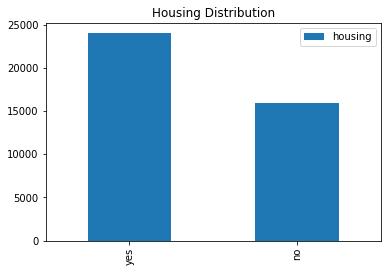

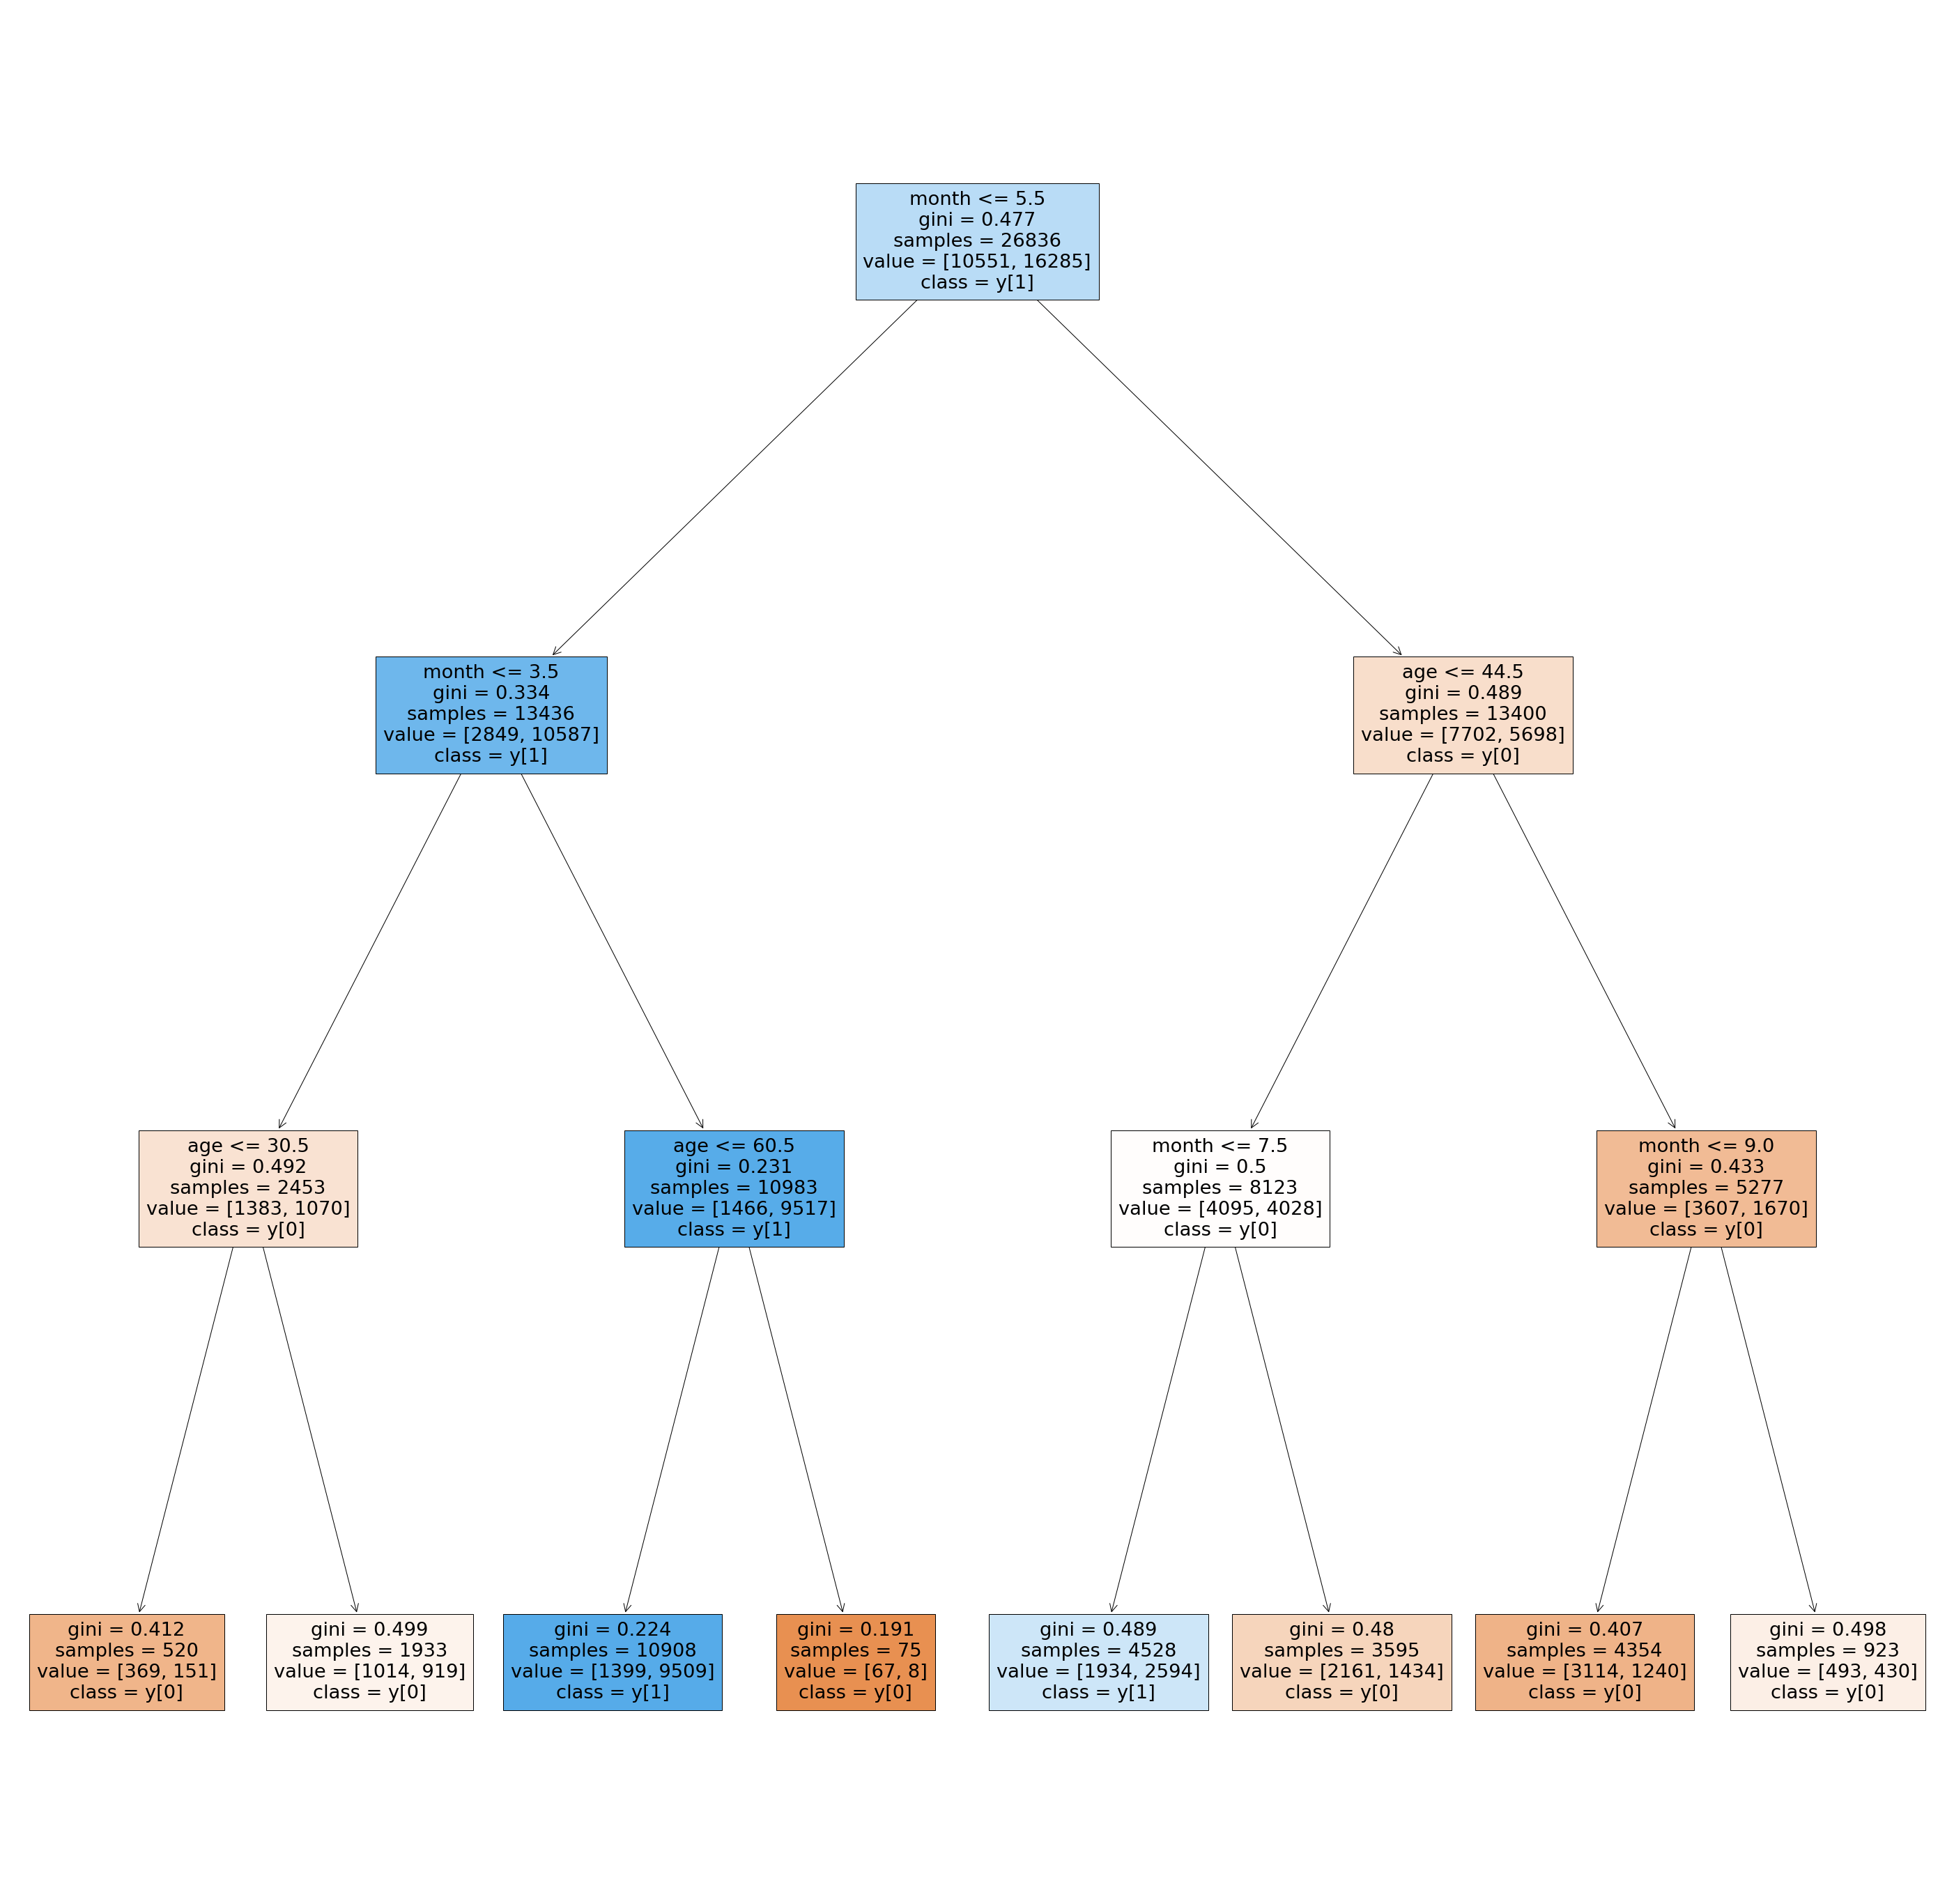

In [49]:

import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
pd.set_option("display.width",10000)
dfs = pd.read_csv("C:/Users/kamur/Desktop/termdepositcase/term-deposit-marketing-2020.csv", sep=",")


print(dfs.describe())  #check numerical data
import matplotlib.pyplot as plt
dfs.housing.value_counts().plot.bar() # # of customers not subscribed is very high
dfs['housing'].value_counts()
plt.legend()
plt.title('Housing Distribution')
dfs.housing.count()

#removing unknown lines as their quantities are small
dfs = dfs[dfs.education != 'unknown']
dfs = dfs[dfs.job != 'unknown']
# print(df.education.value_counts())

dfs.drop('contact', axis=1, inplace=True) #I removed contact variable as most of values are unknown for this variable

binaryvariables =  ['default', 'housing', 'loan', 'y']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
print(dfs[['age','balance','duration','campaign']].groupby(dfs['housing']).mean())
print(dfs[['default', 'housing', 'loan', 'y','marital','education','month']].groupby(dfs['housing']).count())

print(pd.crosstab(dfs['default'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) #default no
print(pd.crosstab(dfs['loan'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) #
print(pd.crosstab(dfs['y'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) #y no
print(pd.crosstab(dfs['marital'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) #single and married
print(pd.crosstab(dfs['education'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) # primary and secondary
print(pd.crosstab(dfs['month'],dfs['housing']).apply(lambda r: r/r.sum(), axis=1)) #april and may

#I though like customers already have house can do investment more as they already done investment and can do more. When I checked housing distribution among other variables,I would focus on  customers don't have credit card, have not subscribed any deposit yet, single or married, graduated from primary or secondary school.





#DECISION TREE SEGMENTATION
#Apart from that, I also imlemented decision tree for segmentation but unfortunately impurity in the nodes were high, that is why I did not evaluated results of below models

dfs[binaryvariables] = dfs[binaryvariables].apply(binary_map)
dfs['month'].replace({'jan': 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},inplace=True)

from sklearn import preprocessing
lb_en  = preprocessing.LabelEncoder()
dfs['job'] = lb_en.fit_transform(dfs['job'])
dfs['marital'] = lb_en.fit_transform(dfs['marital'])
dfs['education'] = lb_en.fit_transform(dfs['education'])
# df['y'].plot(kind='hist')
# plt.show()


categoricalvariables=['default', 'housing', 'loan', 'y','marital','education','contact','month']
binaryvariables =  ['default', 'housing', 'loan', 'y']
numericvariables=['age','balance','duration','campaign']

from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['education'],dfs['housing']))
print("education",stat,p)  #dependent


stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['marital'],dfs['housing']))
print("marital",stat,p)  #independent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['default'],dfs['housing']))
print("default",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['loan'],dfs['housing']))
print("loan",stat,p)  #independent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['y'],dfs['housing']))
print("y",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['month'],dfs['housing']))
print("month",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['job'],dfs['housing']))
print("job",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(dfs['day'],dfs['housing']))
print("day",stat,p)  #dependent


from scipy import stats
print('age',stats.pointbiserialr(dfs['age'],dfs['housing']))  #significant correlation
print('balance',stats.pointbiserialr(dfs['balance'],dfs['housing']))  #significant correlation
print('duration',stats.pointbiserialr(dfs['duration'],dfs['housing']))  #significant correlation
print('campaign',stats.pointbiserialr(dfs['campaign'],dfs['housing']))  #significant correlation

dfs.drop('marital', axis=1, inplace=True) #I removed marital variable due to insignificance
dfs.drop('loan', axis=1, inplace=True) #I removed loan variable due to insignificance




#seperating independent variables and dependent variable
Xtree = dfs.drop('housing', axis = 1)
ytree=dfs['housing']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_traintree, X_testtree, y_traintree, y_testtree = train_test_split(Xtree, ytree, test_size=0.3, random_state=0)

ginitree = DecisionTreeClassifier(criterion="gini",
                                  random_state=0,max_depth=3
                                )

# Performing training
ginitree.fit(X_traintree, y_traintree)
y_predtree = ginitree.predict(X_testtree)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_testtree, y_predtree))
print(confusion_matrix(y_testtree, y_predtree))
from sklearn.metrics import classification_report
print('gini',classification_report(y_testtree, y_predtree))




from sklearn import tree



entropytree = DecisionTreeClassifier(criterion="entropy",
                                  random_state=0,max_depth=3
                                    )

# Performing training
entropytree.fit(X_traintree, y_traintree)
y_predtree = entropytree.predict(X_testtree)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_testtree, y_predtree))
print(confusion_matrix(y_testtree, y_predtree))
from sklearn.metrics import classification_report
print('entropy',classification_report(y_testtree, y_predtree))




fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(ginitree,
                   feature_names=Xtree.columns,
                   filled=True,class_names=True)

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


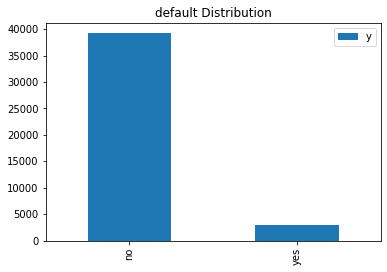

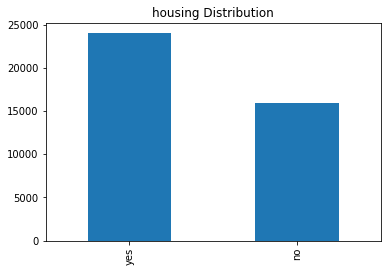

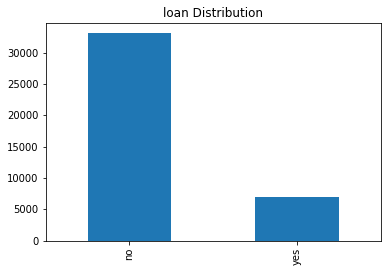

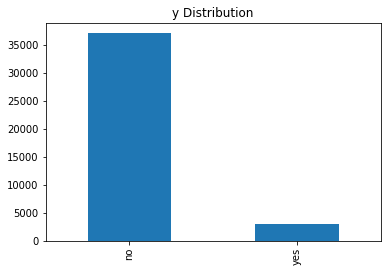

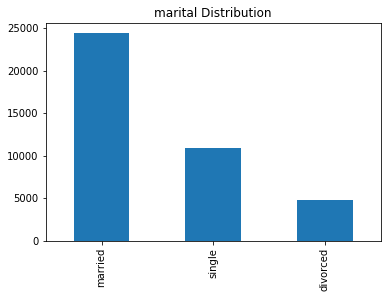

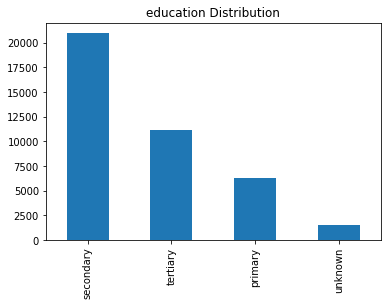

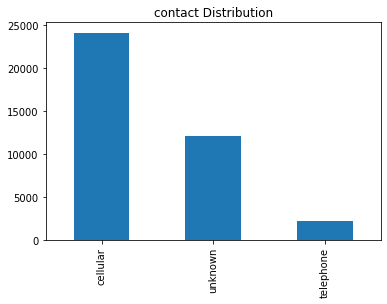

cellular     24108
unknown      12043
telephone     2187
Name: contact, dtype: int64
may    12974
jul     6128
aug     5070
jun     4405
nov     3492
apr     2621
feb     2205
jan     1110
mar      243
oct       77
dec       13
Name: month, dtype: int64
education 94.26355503023655 3.395698344366898e-21
marital 136.50618789259212 2.280646244843172e-30
default 2.3625231635264665 0.1242810289838368
job 151.84712711537833 1.5534222521795608e-27
housing 117.21405236972785 2.5769909633758457e-27
loan 40.479131590560016 1.9872725897696565e-10
day 388.4657478123096 5.944952698099051e-64
month 1512.5501883612537 0.0
age PointbiserialrResult(correlation=-0.01932411786901776, pvalue=0.00015438369237348931)
balance PointbiserialrResult(correlation=0.027283912035101682, pvalue=9.140288043331718e-08)
duration PointbiserialrResult(correlation=0.46252004504354444, pvalue=0.0)
campaign PointbiserialrResult(correlation=-0.040342382793194895, pvalue=2.7438683172277953e-15)


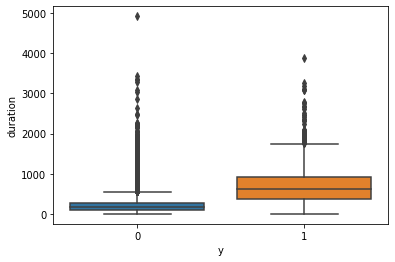

durationshapiro (0.7190784811973572, 0.0)


C:\Users\kamur\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


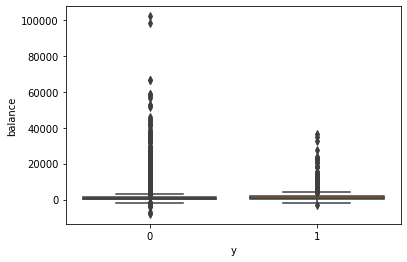

C:\Users\kamur\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\kamur\anaconda3\lib\site-packages\ipykernel_launcher.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kamur\anaconda3\lib\site-packages\ipykernel_launcher.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kamur\anaconda3\lib\site-packages\ipykernel_launcher.py:170: SettingWithCopyWarning: 

balanceshapiro (0.45801085233688354, 0.0)


ModuleNotFoundError: No module named 'imblearn'

In [51]:

import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",1000)
pd.set_option("display.width",10000)
df = pd.read_csv("C:/Users/kamur/Desktop/termdepositcase/term-deposit-marketing-2020.csv", sep=",")


# print(df) #data has 40000 rows and 14 columns, dataframe
# print(df.head())  #check only first six rows
# print(df.shape)  #dimensions of data
# print(df.info())  #columns types are ok. no missing value for columns.
df.isnull().sum() #no missing value

print(df.describe())  #check numerical data
import matplotlib.pyplot as plt
df.y.value_counts().plot.bar() # # of customers not subscribed is very high
df['y'].value_counts()
plt.legend()
plt.title('Subscribe Distribution')
df.y.count()



# df['y'].plot(kind='hist')
# plt.show()


categoricalvariables=['default', 'housing', 'loan', 'y','marital','education','contact']
binaryvariables =  ['default', 'housing', 'loan', 'y']
numericvariables=['age','balance','duration','campaign']

df['default'].value_counts().plot.bar()
plt.title('default Distribution')
plt.show()
df['housing'].value_counts().plot.bar()
plt.title('housing Distribution')
plt.show()
df['loan'].value_counts().plot.bar()
plt.title('loan Distribution')
plt.show()
df['y'].value_counts().plot.bar()
plt.title('y Distribution')
plt.show()
df['marital'].value_counts().plot.bar()
plt.title('marital Distribution')
plt.show()
df['education'].value_counts().plot.bar()
plt.title('education Distribution')
plt.show()
# print(df.education.value_counts())
# print(df.job.value_counts())
#removing unknown lines as their quantities are small
df = df[df.education != 'unknown']
df = df[df.job != 'unknown']
# print(df.education.value_counts())

df['contact'].value_counts().plot.bar()
plt.title('contact Distribution')
plt.show()
print(df.contact.value_counts())



df.drop('contact', axis=1, inplace=True) #I removed contact variable as most of values are unknown for this variable

#assigning 0 and 1 for binary variables
def binary_map(x):
    return x.map({'yes': 1, "no": 0})


df[binaryvariables] = df[binaryvariables].apply(binary_map)
# print(df.head())

print(df.month.value_counts())

df['month'].replace({'jan': 1, "feb": 2,"mar": 3,"apr": 4,"may": 5,"jun": 6,"jul": 7,"aug": 8,"sep": 9,"oct": 10,"nov": 11,"dec": 12},inplace=True)  #replacing months with numeric values as we need to convert to numeric and they are ordinal

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummydata = pd.get_dummies(df[['marital', 'education','job']], drop_first=True)

df = pd.concat([df, dummydata], axis=1)



#encoding categorical variables to do chisquaretest
from sklearn import preprocessing
lb_en  = preprocessing.LabelEncoder()
job = lb_en.fit_transform(df['job'])
# print(df.job.unique())
# print(type(df.job))
education = lb_en.fit_transform(df['education'])
marital = lb_en.fit_transform(df['marital'])

#chisquare test between categorical variables and dependent categorical variable to check association
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(pd.crosstab(education,df['y']))
print("education",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(marital,df['y']))
print("marital",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['default'],df['y']))
print("default",stat,p)  #independent, remove this variable

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['job'].values,df['y']))
print("job",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['housing'],df['y']))
print("housing",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['loan'],df['y']))
print("loan",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['day'],df['y']))
print("day",stat,p)  #dependent

stat, p, dof, expected = chi2_contingency(pd.crosstab(df['month'],df['y']))
print("month",stat,p) #dependent

#pointbiserial test between numerical variables and dependent y variable to check association
from scipy import stats
print('age',stats.pointbiserialr(df['age'],df['y']))  #low correlation
print('balance',stats.pointbiserialr(df['balance'],df['y']))
print('duration',stats.pointbiserialr(df['duration'],df['y']))
print('campaign',stats.pointbiserialr(df['campaign'],df['y']))


df.drop(['marital', 'education','default','age','job'], axis=1, inplace=True) #remove job,marital and education as we created dummy variables. remove default,age as they are not associated or are insignificant variables


#correlation test between numeric variables to eliminate multicolinearity
df.corr()[df.corr()>0.4]
#there is correlation more than 0.4 between duration and y

import seaborn as sns
durationboxplot=sns.boxplot(x=df['y'],y=df['duration'],data=df)
plt.show()

print('durationshapiro',stats.shapiro(df.duration)) #duration values are not normal distributed. So I need to change outliers with median

balanceboxplot=sns.boxplot(x=df['y'],y=df['balance'],data=df)
plt.show()

print('balanceshapiro',stats.shapiro(df.balance)) #balance values are not normal distributed. So I need to change outliers with median

df1=df[df['y']==1]
df0=df[df['y']==0]

qd11 = pd.DataFrame(df1['duration']).quantile(0.25)[0]
qd13 = pd.DataFrame(df1['duration']).quantile(0.75)[0]
iqrd1 = qd13 - qd11 #Interquartile range
mind1 = qd11 - (1.5*iqrd1)
maxd1 = qd13 + (1.5*iqrd1)

qd01 = pd.DataFrame(df0['duration']).quantile(0.25)[0]
qd03 = pd.DataFrame(df0['duration']).quantile(0.75)[0]
iqrd0 = qd03 - qd01 #Interquartile range
mind0 = qd01 - (1.5*iqrd0)
maxd0 = qd03 + (1.5*iqrd0)


mediand1=df1.duration.median()
mediand0=df0.duration.median()


df1["duration"] = np.where(df1["duration"] <mind1, mediand1,df1['duration'])
df1["duration"] = np.where(df1["duration"] >maxd1, mediand1,df1['duration'])

df0["duration"] = np.where(df0["duration"] <mind0, mediand0,df0['duration'])
df0["duration"] = np.where(df0["duration"] >maxd0, mediand0,df0['duration'])




qb11 = pd.DataFrame(df1['balance']).quantile(0.25)[0]
qb13 = pd.DataFrame(df1['balance']).quantile(0.75)[0]
iqrb1 = qb13 - qb11 #Interquartile range
minb1 = qb11 - (1.5*iqrb1)
maxb1 = qb13 + (1.5*iqrb1)

qb01 = pd.DataFrame(df0['balance']).quantile(0.25)[0]
qb03 = pd.DataFrame(df0['balance']).quantile(0.75)[0]
iqrb0 = qb03 - qb01 #Interquartile range
minb0 = qb01 - (1.5*iqrb0)
maxb0 = qb03 + (1.5*iqrb0)


medianb1=df1.balance.median()
medianb0=df0.balance.median()


df1["balance"] = np.where(df1["balance"] <minb1, medianb1,df1['balance'])
df1["balance"] = np.where(df1["balance"] >maxb1, medianb1,df1['balance'])

df0["balance"] = np.where(df0["balance"] <minb0, medianb0,df0['balance'])
df0["balance"] = np.where(df0["balance"] >maxb0, medianb0,df0['balance'])

#merging after outlier controls
df = pd.concat([df1, df0], axis=0)


#seperating independent variables and dependent variable
X = df.drop('y', axis = 1)
y=df['y']


#standard scaling operation for adjustment of weights of numbers in variables to our model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X[['month','day','duration','balance']] = sc.fit_transform(X[['month','day','duration','balance']])


#SMOTE operation as dependent variable is not fair distributed for term deposit
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Xtraincolumns = X_train.columns
smotetrainX,smotetrainy=smote.fit_sample(X_train, y_train)
smotetrainX = pd.DataFrame(data=smotetrainX,columns=Xtraincolumns )
smotetrainy= pd.DataFrame(data=smotetrainy,columns=['y'])
print(y_train.value_counts())
print(smotetrainy.y.value_counts())




#statsmodels GLM to check coefficients of our model
import statsmodels.api as sm
logit_model=sm.Logit(smotetrainy,smotetrainX)
result=logit_model.fit()
print(result.summary2())


from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(smotetrainX,smotetrainy)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

smotetrainX = smotetrainX.drop('day', axis = 1)
smotetrainX = smotetrainX.drop('marital_married', axis = 1)
smotetrainX = smotetrainX.drop('marital_single', axis = 1)
X_test = X_test.drop('day', axis = 1)
X_test = X_test.drop('marital_married', axis = 1)
X_test = X_test.drop('marital_single', axis = 1)

#SECOND MODEL
logit_model=sm.Logit(smotetrainy,smotetrainX)
result=logit_model.fit()
print(result.summary2())


from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(smotetrainX,smotetrainy)


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=model, X=smotetrainX, y=smotetrainy, cv=5)
print(accuracies.mean())


y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import roc_auc_score
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('area under curve',auc)